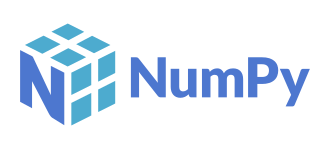

# Numpy: Numeric computing library

NumPy (Numerical Python) is one of the core packages for numerical computing in Python. Pandas, Matplotlib, Statmodels and many other Scientific libraries rely on NumPy.

NumPy major contributions are:

 - Efficient numeric computation with C primitives
 - Efficient collections with vectorized operations
 - An integrated and natural Linear Algebra API
 - A C API for connecting NumPy with libraries written in C, C++, or FORTRAN.

Let's develop on efficiency. In Python, __everything is an object__, which means that even simple ints are also objects, with all the required machinery to make object work. We call them "Boxed Ints". In contrast, NumPy uses primitive numeric types (floats, ints) which makes storing and computation efficient.

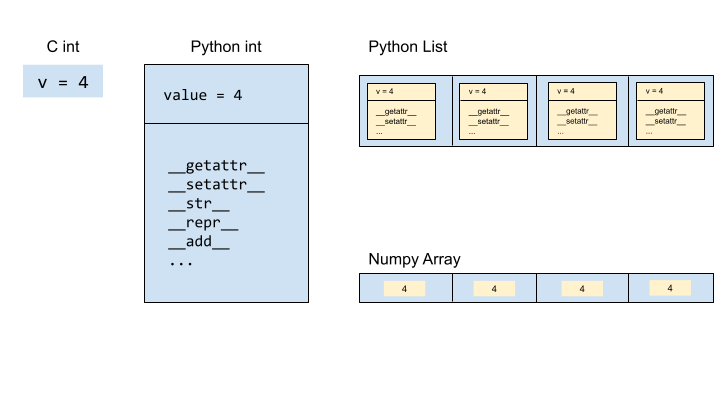

In Python numeric processing is slow. When you're processing large amounts of data, NumPy allows you to use high performing numeric computations. It's important, but not popular. You won't use NumPy by itself for analysis, but other packages like pandas and matplotlib are all working on top of NumPy.

***

In [1]:
import sys
import numpy as np

## Basic Numpy Arrays

At it's core, NumPy is a simple library for array processing and numeric processing. It has a few objects: numbers, floats, integer floats, and arrays. Simple but powerful.

In [2]:
np.array([1, 2, 3, 4])

array([1, 2, 3, 4])

Let's create two arrays by calling `np.array()` and passing in a list. Usually we read these in from external sources.

In [3]:
a = np.array([1, 2, 3, 4])

In [4]:
b = np.array([0, .5, 1, 1.5, 2])

How do you access the elements of a NumPy array? The same way you do it with a Python list.

In [5]:
a[0], a[1] # give me the first and second element; remember Python is zero indexed.

(1, 2)

In [6]:
a[0:] #slicing works too in this case 0 to something

array([1, 2, 3, 4])

In [7]:
a[1:3] # one up to three

array([2, 3])

Negative index and steps work in the same way as a Python list

In [8]:
a[1:-1]

array([2, 3])

In [9]:
a[::2]

array([1, 3])

One new thing with NumPy arrays that is different than lists is _multi-indexing_

In [10]:
b

array([0. , 0.5, 1. , 1.5, 2. ])

Suppose we want to extract three elements from our b array: the first, third, and last position

In [11]:
b[0], b[2], b[-1] #could type this

(0.0, 1.0, 2.0)

In [12]:
b[[0, 2, -1]] #or multi-index

array([0., 1., 2.])

Here we're passing another list containing the indexes of the elements we want. You'll also notice that the result of multi-indexing is another NumPy array which is a lot faster to process.

***

## Array Types

NumPy arrays have types associated with them. The NumPy library needs to know they type of array in order to efficiently store values in memory to take full advantage of NumPy's speed.

For example, when we created the array `a` full of integers

In [13]:
a

array([1, 2, 3, 4])

`Python` correctly assigns an `int` type to the array. You can also tune this. (32 is just the bit system of my machine).

In [14]:
a.dtype

dtype('int32')

In contrast, array `b` had decimal values

In [15]:
b

array([0. , 0.5, 1. , 1.5, 2. ])

Which get assigned a float type

In [16]:
b.dtype

dtype('float64')

Here you see `float64` because this machine is a 64-bit machine. You can force a type by including the `dtype` arguement in the `array` function

In [17]:
np.array([1, 2, 3, 4], dtype=np.float) #all integers, but we store as float

array([1., 2., 3., 4.])

In [18]:
np.array([1, 2, 3, 4], dtype=np.int8) #or we can save some memory and store values as a smaller int

array([1, 2, 3, 4], dtype=int8)

There are also string types and irregular objects

In [19]:
c = np.array(['a', 'b', 'c'])

In [20]:
c.dtype

dtype('<U1')

Strings have their own type and it's related to the unicode representation memory

In [21]:
d = np.array([{'a': 1}, sys]) #not sure why this is useful

In [22]:
d.dtype

dtype('O')

No real point of storing these kinds of things in NumPy. NumPy is useful for storing numbers, dates, and booleans. Irregular objects not so much. NumPy is generally used for _numeric_ processing

***

## Dimensions and shapes

The main point of NumPy is that we can create multi-dimensional arrays. What we created before were just one-dimensional arrays. We can also create matrices. 

In [23]:
A = np.array([
    [1, 2, 3],
    [4, 5, 6]
])

In [24]:
A.shape #what's the shape of our matrix in this case a 2 (row) by 3 column array/matrix/whatever you want to call it

(2, 3)

In [25]:
A.ndim #how many dimensions are in our array

2

In [26]:
A.size # the total number of elements

6

Let's go one dimension further by creating a three dimensional array.

In [27]:
B = np.array([
    [
        [12, 11, 10],
        [9, 8, 7],
    ],
    [
        [6, 5, 4],
        [3, 2, 1]
    ]
])

In [28]:
B

array([[[12, 11, 10],
        [ 9,  8,  7]],

       [[ 6,  5,  4],
        [ 3,  2,  1]]])

In [29]:
B.shape

(2, 2, 3)

In this case, B is 2 x 2 x 3, the number of dimensions is 3

In [30]:
B.ndim

3

In [31]:
B.size # total count of elements

12

Be careful when creating multi-dimensional arrays. If the shape isn't consistent, it'll just fall back to regular Python objects:

In [32]:
C = np.array([
    [
        [12, 11, 10],
        [9, 8, 7],
    ],
    [
        [6, 5, 4] 
    ]
])

<ipython-input-32-249fabb3d948>:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  C = np.array([


In [33]:
C.dtype #type "object"

dtype('O')

In [34]:
C.shape #we only have 2 elements

(2,)

In [35]:
C.size

2

In [36]:
type(C[0])

list

***

## Indexing and Slicing of Matrices

How do you index and slice matrices? We've done it for a one-dimensional array

In [37]:
# Square matrix
A = np.array([
#.   0. 1. 2
    [1, 2, 3], # 0
    [4, 5, 6], # 1
    [7, 8, 9]  # 2
])

It's similar to what we did before except now you need to account for multiple dimensions

In [38]:
A[1] # Is this column one or row one? it's the row.

array([4, 5, 6])

In [39]:
A[1][0] #get first element of the second row?

4

There's a better way, you can pass dimensions to the array

In [40]:
# A[d1, d2, d3, d4]

A[1, 0]#get first element of the second row?

4

The advantage of this syntax is that it lets you add slicing

In [41]:
A[0:2] # get everything up to two from the first dimension (rows). Remember 2 is not included (row 3) cause slicing uses upper limits

array([[1, 2, 3],
       [4, 5, 6]])

In [42]:
A[:,:2] # select every row and the first two columns

array([[1, 2],
       [4, 5],
       [7, 8]])

In [43]:
A[:2, 2:]

array([[3],
       [6]])

If we want to modify a value within our array

In [44]:
A

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [45]:
A[1] = np.array([10,10,10]) #update the second row; make sure the dimensions match

In [46]:
A[2] = 99 #using the expand operation

In [47]:
A

array([[ 1,  2,  3],
       [10, 10, 10],
       [99, 99, 99]])

NumPy took care of expanding 99 across all of our dimensions in row three.

***

## Summary statistics

Another advantage of NumPy is you have access to countless operations you can perform on your arrays. 

In [48]:
a = np.array([1, 2, 3, 4])

including all of the numerical summary operations

In [49]:
a.sum()

10

In [50]:
a.mean()

2.5

In [51]:
a.std()

1.118033988749895

In [52]:
a.var()

1.25

These also work for matrices

In [53]:
A = np.array([
    [1, 2, 3],
    [4, 5, 6],
    [7, 8, 9]
])

In [54]:
A.sum()

45

In [55]:
A.mean()

5.0

In [56]:
A.std()

2.581988897471611

We can also perform the operations per axis

In [57]:
A.sum(axis=0) #by column

array([12, 15, 18])

In [58]:
A.sum(axis=1) #by row; row sums

array([ 6, 15, 24])

In [59]:
A.mean(axis=1)

array([2., 5., 8.])

In [60]:
A.std(axis=0)

array([2.44948974, 2.44948974, 2.44948974])

In [61]:
A.std(axis=1)

array([0.81649658, 0.81649658, 0.81649658])

And many many [more](https://docs.scipy.org/doc/numpy-1.13.0/reference/arrays.ndarray.html#array-methods) . . .

If you have more dimensions, you can just keep increasing the axis number

***

## Broadcasting and Vectorized operations

Vectorized operations is somewhat fundamental for us and is related to boolean arrays

In [62]:
a = np.arange(4)

In [63]:
a

array([0, 1, 2, 3])

Vectorized operations just mean operations performed between arrays or arrays and scalars. They're optimized to be extremely fast.

In [64]:
a + 10 #sum every element in the array with 10

array([10, 11, 12, 13])

In [65]:
a * 10 #multiply every element in the array with 10

array([ 0, 10, 20, 30])

Internally the operation is broadcasted to each individual element of the array resulting in a new array.

In [66]:
a

array([0, 1, 2, 3])

Notice that `a` is unchanged. That's because NumPy is an immutable first library. That is, we can perform operations on the original array and get new arrays, but the original array is the same.

You can override this behavior by using +=, -=, \*= which will all modify the array.

In [67]:
a+=100

In [68]:
a #now `a` is modified

array([100, 101, 102, 103])

In pure `Python` vectorized operations are list comprehensions in which you're expressing an operation for each element in a collection. The fundamental difference is the operations in NumPy are much faster.

In [69]:
l = [0, 1, 2, 3]

In [70]:
[i * 10 for i in l]

[0, 10, 20, 30]

This vectorized operation isn't limited to just scalars and arrays. It also applies to arrays and arrays. 

In [71]:
a = np.arange(4)

In [72]:
a

array([0, 1, 2, 3])

In [73]:
b = np.array([10, 10, 10, 10])

In [74]:
b

array([10, 10, 10, 10])

In [75]:
a + b # here the sum operation is performed element by element of the original arrays.

array([10, 11, 12, 13])

In [76]:
a * b

array([ 0, 10, 20, 30])

For this to work, the arrays must have the same shape.

***

### Boolean arrays

(Sometimes called _masks_)

Why do we care about vectorized operations? It's paramount to the concept of Boolean arrays. We'll use this a ton. In `Pandas`, the same concepts apply. In addition to mathematical operators, we often have Boolean operators. In this section we'll explore what happens when you apply Boolean operations to NumPy arrays. 

In [77]:
a = np.arange(4) #get a starting array

In [78]:
a

array([0, 1, 2, 3])

Earlier we saw that we could extract elements from arrays with the positional syntax

In [79]:
a[0], a[-1] # traditional python

(0, 3)

In [80]:
a[[0, -1]] # with multi-index dimension syntax

array([0, 3])

There's a third way using Boolean arrays

In [81]:
a[[True, False, False, True]] #pass true or false depending on which element you want to select

array([0, 3])

Nothing crazy, just another way to select elements. But are we really going to manually write True, False, False, True, ...?

It's not scalable, but we can broadcast boolean operations the same way we broadcasted mathematical operations. 

In [82]:
a

array([0, 1, 2, 3])

Suppose we ask a question like, "Is a greater than or equal to 2?"

In [83]:
a >= 2 

array([False, False,  True,  True])

Notice it returns a Boolean array. This means we can use it to select elements from an array. The largest application come when we're required to filter data before analysis. We get to do it with a familiar syntax.

In [84]:
a[a >= 2] #include the condition as a filter

array([2, 3])

In [85]:
a.mean()

1.5

In [86]:
a[a > a.mean()] # can include functions

array([2, 3])

In [87]:
a[~(a > a.mean())] # not greater than mean

array([0, 1])

In [88]:
a[(a == 0) | (a == 1)] #OR

array([0, 1])

In [89]:
a[(a <= 2) & (a % 2 == 0)] #AND (less than 2 and divisible by 2)

array([0, 2])

In [90]:
A = np.random.randint(100, size=(3, 3))

In [91]:
A

array([[92, 23, 49],
       [62,  4, 11],
       [53, 63, 56]])

In [92]:
A[np.array([
    [True, False, True],
    [False, True, False],
    [True, False, True]
])] #we don't really do this

array([92, 49,  4, 53, 56])

In [93]:
A > 30

array([[ True, False,  True],
       [ True, False, False],
       [ True,  True,  True]])

In [94]:
A[A > 30] #run a filtering operation

array([92, 49, 62, 53, 63, 56])

***

### Linear Algebra

This isn't a math class, but it's worth pointing out that NumPy contains the important operations (already optimized with low level semantics so it's extremely fast)

In [95]:
A = np.array([
    [1, 2, 3],
    [4, 5, 6],
    [7, 8, 9]
])

In [96]:
B = np.array([
    [6, 5],
    [4, 3],
    [2, 1]
])

In [97]:
A.dot(B) #dot product

array([[20, 14],
       [56, 41],
       [92, 68]])

In [98]:
A @ B #cross product

array([[20, 14],
       [56, 41],
       [92, 68]])

In [99]:
B.T #transposing a matrix

array([[6, 4, 2],
       [5, 3, 1]])

In [100]:
A

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [101]:
B.T @ A

array([[36, 48, 60],
       [24, 33, 42]])

As you advance in your machine learning career, you'll find that linear algebra concepts come up over and over and over again. I don't want to dive to deep here, just want to call out that NumPy can do it.

***

## Size of objects in Memory

Take a look at some of the differences between Python proper and NumPy. Python is relatively inefficient compared to NumPy.

### Int, floats

In [102]:
# An integer in Python is > 24bytes
sys.getsizeof(1)

28

In [103]:
# Longs are even larger
sys.getsizeof(10**100)

72

In [104]:
# Numpy size is much smaller
np.dtype(int).itemsize

4

In [105]:
# Numpy size is much smaller
np.dtype(np.int8).itemsize

1

In [106]:
np.dtype(float).itemsize

8

### Lists are even larger

In [107]:
# A one-element list
sys.getsizeof([1])

64

In [108]:
# An array of one element in numpy
np.array([1]).nbytes

4

### And performance is also important

In [109]:
l = list(range(100000))

In [110]:
a = np.arange(100000)

In [111]:
%time np.sum(a ** 2)

Wall time: 1 ms


216474736

In [112]:
%time sum([x ** 2 for x in l])

Wall time: 57.8 ms


333328333350000

## Useful Numpy functions

### random

In [113]:
np.random.random(size=2)

array([0.92097284, 0.10760359])

In [114]:
np.random.normal(size=2)

array([-0.26761957, -0.53335804])

In [115]:
np.random.rand(2, 4)

array([[0.54653575, 0.19611396, 0.92630704, 0.43160943],
       [0.9806599 , 0.9057633 , 0.8524132 , 0.7869349 ]])

###  arange

In [116]:
np.arange(10)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [117]:
np.arange(5, 10)

array([5, 6, 7, 8, 9])

In [118]:
np.arange(0, 1, .1)

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

### reshape

In [119]:
np.arange(10).reshape(2, 5)

array([[0, 1, 2, 3, 4],
       [5, 6, 7, 8, 9]])

In [120]:
np.arange(10).reshape(5, 2)

array([[0, 1],
       [2, 3],
       [4, 5],
       [6, 7],
       [8, 9]])

### linspace

In [121]:
np.linspace(0, 1, 5)

array([0.  , 0.25, 0.5 , 0.75, 1.  ])

In [122]:
np.linspace(0, 1, 20)

array([0.        , 0.05263158, 0.10526316, 0.15789474, 0.21052632,
       0.26315789, 0.31578947, 0.36842105, 0.42105263, 0.47368421,
       0.52631579, 0.57894737, 0.63157895, 0.68421053, 0.73684211,
       0.78947368, 0.84210526, 0.89473684, 0.94736842, 1.        ])

In [123]:
np.linspace(0, 1, 20, False)

array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
       0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95])

### zeros, ones, empty

In [124]:
np.zeros(5)

array([0., 0., 0., 0., 0.])

In [125]:
np.zeros((3, 3))

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

In [126]:
np.zeros((3, 3), dtype=np.int)

array([[0, 0, 0],
       [0, 0, 0],
       [0, 0, 0]])

In [127]:
np.ones(5)

array([1., 1., 1., 1., 1.])

In [128]:
np.ones((3, 3))

array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]])

In [129]:
np.empty(5)

array([1., 1., 1., 1., 1.])

In [130]:
np.empty((2, 2))

array([[0.25, 0.5 ],
       [0.75, 1.  ]])

### identity and eye

In [131]:
np.identity(3)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [132]:
np.eye(3, 3)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [133]:
np.eye(8, 4)

array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [134]:
np.eye(8, 4, k=1)

array([[0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [135]:
np.eye(8, 4, k=-3)

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 0., 0., 0.]])

In [136]:
"Hello World"[6]

'W'